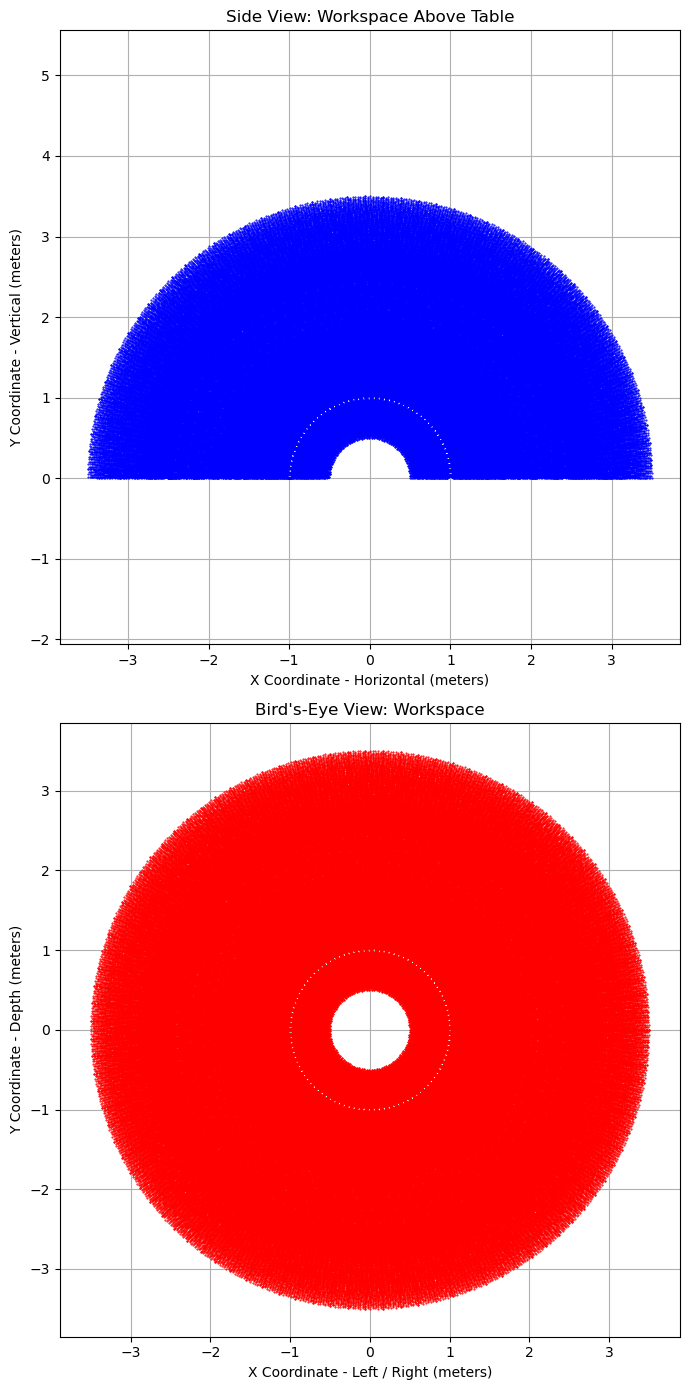

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the lengths of the links of the robotic arm
L1 = 1.0  # Length of the first link (in meters)
L2 = 1.0  # Length of the second link (in meters)
d3_min = 0.5  # Minimum extension of the prismatic joint (in meters)
d3_max = 1.5  # Maximum extension of the prismatic joint (in meters)

# Define the range of motion for each joint (in radians or meters)
theta1_range = np.linspace(0, 2 * np.pi, 100)  # Joint 1 can rotate from 0 to 360 degrees
theta2_range = np.linspace(0, 2 * np.pi, 100)  # Joint 2 can rotate from 0 to 360 degrees
d3_range = np.linspace(d3_min, d3_max, 50)     # Prismatic joint extension range

# Create lists to store the x and y coordinates of the end effector
x_coords = []
y_coords = []

# Create lists to store the x and y coordinates of the end effector for the bird's-eye view
x_birdseye = []
y_birdseye = []

# Loop through all possible combinations of theta1, theta2, and d3
for theta1 in theta1_range:
    for theta2 in theta2_range:
        for d3 in d3_range:
            # Calculate the position of the end effector in 2D space
            x = L1 * np.cos(theta1) + (L2 + d3) * np.cos(theta1 + theta2)
            y = L1 * np.sin(theta1) + (L2 + d3) * np.sin(theta1 + theta2)
            
            # For the side view, only store coordinates where y >= 0 (above the table)
            if y >= 0:
                x_coords.append(x)
                y_coords.append(y)
                
            # For the bird's-eye view, store all coordinates
            x_birdseye.append(x)
            y_birdseye.append(y)

# Plot the side view of the robotic arm (above the table) and bird's-eye view in portrait style
plt.figure(figsize=(7, 14))  # Set figure size to portrait orientation

# Side view plot (Top)
plt.subplot(2, 1, 1)
plt.plot(x_coords, y_coords, 'b.', markersize=1)
plt.title("Side View: Workspace Above Table")
plt.xlabel("X Coordinate - Horizontal (meters)")
plt.ylabel("Y Coordinate - Vertical (meters)")
plt.grid(True)
plt.axis('equal')

# Bird's-eye view plot (Bottom)
plt.subplot(2, 1, 2)
plt.plot(x_birdseye, y_birdseye, 'r.', markersize=1)
plt.title("Bird's-Eye View: Workspace")
plt.xlabel("X Coordinate - Left / Right (meters)")
plt.ylabel("Y Coordinate - Depth (meters)")
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()

